## Observations and Insights 

In [189]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')


# Display the data table for preview
merged_data.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22

In [190]:
# Checking the number of mice.
total_mice = len(merged_data['Mouse ID'].unique())
total_mice

249

In [191]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
861     g989          0           45.000000                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
867     g989         15           53.442020                 0     Propriva   
869     g989         20           54.657650                 1     Propriva   

        Sex  Age_months  Weight (g)  
861  Female          21          26  
863  Female          21          26  
865  Female          21          26  
867  Female          21          26  
869  Female          21          26

In [192]:
# Optional: Get all the data for the duplicate mouse ID. 
get_duplicate = merged_data[merged_data.duplicated(['Mouse ID',])]
get_duplicate.head(15)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1      b128          5           45.651331                 0    Capomulin   
2      b128         10           43.270852                 0    Capomulin   
3      b128         15           43.784893                 0    Capomulin   
4      b128         20           42.731552                 0    Capomulin   
5      b128         25           43.262145                 1    Capomulin   
6      b128         30           40.605335                 1    Capomulin   
7      b128         35           37.967644                 1    Capomulin   
8      b128         40           38.379726                 2    Capomulin   
9      b128         45           38.982878                 2    Capomulin   
12     g107          5           48.791665                 0     Ketapril   
13     g107         10           53.435987                 0     Ketapril   
14     g107         15           58.135545                 0     Ketapril   
15     g107         20           62.706031                 0     Ketapril   
16     g107         25           64.663626                 0     Ketapril   
17     g107         30           69.160520                 0     Ketapril   

       Sex  Age_months  Weight (g)  
1   Female           9          22  
2   Female           9          22  
3   Female           9          22  
4   Female           9          22  
5   Female           9          22  
6   Female           9          22  
7   Female           9          22  
8   Female           9          22  
9   Female           9          22  
12  Female           2          29  
13  Female           2          29  
14  Female           2          29  
15  Female           2          29  
16  Female           2          29  
17  Female           2          29

In [193]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data[merged_data['Mouse ID']!="g989"]
clean_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        b128          5           45.651331                 0    Capomulin   
2        b128         10           43.270852                 0    Capomulin   
3        b128         15           43.784893                 0    Capomulin   
4        b128         20           42.731552                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1888     m601         25           33.118756                 1    Capomulin   
1889     m601         30           31.758275                 1    Capomulin   
1890     m601         35           30.834357                 1    Capomulin   
1891     m601         40           31.378045                 1    Capomulin   
1892     m601         45           28.430964                 1    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1     Female           9          22  
2     Female           9          22  
3     Female           9          22  
4     Female           9          22  
...      ...         ...         ...  
1888    Male          22          17  
1889    Male          22          17  
1890    Male          22          17  
1891    Male          22          17  
1892    Male          22          17  

[1880 rows x 8 columns]

In [194]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(clean_df['Mouse ID'].unique())
mice_count

248

## Summary Statistics

In [195]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
st_dev = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


summary_stats = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': variance, 'Standard Deviation': st_dev, 'SEM': sem})
summary_stats

# This method is the most straighforward, creating multiple series and putting them all together at the end.



Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Unique Mice Tested')

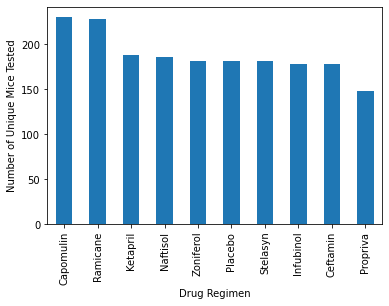

In [196]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
clean_df['Drug Regimen'].value_counts().plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

[Text(0, 0, 'Capomulin'),
 Text(0, 0, 'Ketapril'),
 Text(0, 0, 'Naftisol'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Stelasyn'),
 Text(0, 0, 'Ramicane'),
 Text(0, 0, 'Zoniferol'),
 Text(0, 0, 'Propriva'),
 Text(0, 0, 'Placebo'),
 Text(0, 0, 'Ceftamin')]

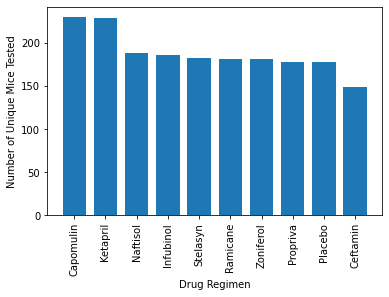

In [197]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drugs_df = clean_df['Drug Regimen'].value_counts()
drug = clean_df['Drug Regimen'].unique()

fig = plt.figure()
a = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

a.bar(drug, drugs_df,width=0.75)

a.set_xlabel("Drug Regimen")
a.set_ylabel("Number of Unique Mice Tested")
a.set_xticklabels(drug,rotation=90)

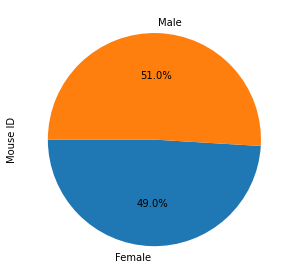

In [198]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df.groupby('Sex')
combined_gender = gender['Mouse ID'].count()

male_v_female_pie = combined_gender.plot(kind="pie", autopct="%1.1f%%", y=gender, startangle=180)


plt.tight_layout()
plt.show()


([<matplotlib.patches.Wedge at 0x7fd3159a1f10>,
 [Text(-0.0330820140826155, -1.0995024239828841, 'Female'),
  Text(0.03308201408261563, 1.0995024239828841, 'Male')],
 [Text(-0.018044734954153905, -0.5997285948997549, '49.0%'),
  Text(0.018044734954153978, 0.5997285948997549, '51.0%')])

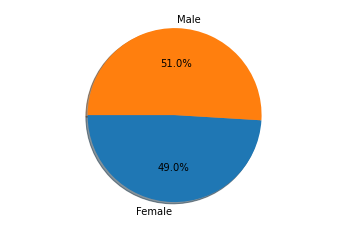

In [199]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_df.groupby('Sex')
combined_gender = gender['Mouse ID'].count()
labels = ["Female", "Male"]
plt.axis("equal")
plt.pie(combined_gender, labels=labels, autopct="%1.1f%%", shadow=True, startangle=180)


## Quartiles, Outliers and Boxplots

In [200]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
regimen = clean_df[clean_df['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Cetaimin"])]
greatest_tp = regimen.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].last()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(greatest_tp, clean_df, how="left", 
                      on='Mouse ID').rename(columns={"Timepoint_x": "Last Timepoint", "Timepoint_y": "Measured Timepoint"})
regimen_volume = merged_df.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]

reset_index = regimen.reset_index()



In [215]:
# Put treatments into a list for for loop (and later for plot labels)
d = ["Capomulin", "Ramicane", "Infubinol", "Cetaimin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    # add subset 
    # Determine outliers using upper and lower bounds
    
for drug in d:
    list = reset_index[reset_index["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_vol_data.append(list)

    quartiles = list.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print("________")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")  

    

________
The lower quartile of Capomulin is: 37.685932865
The upper quartile of Capomulin is: 45.0
The interquartile range of Capomulin is: 7.314067135000002
The the median of Capomulin is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.
________
The lower quartile of Ramicane is: 36.67463458499999
The upper quartile of Ramicane is: 45.0
The interquartile range of Ramicane is: 8.325365415000007
The the median of Ramicane is: 40.67323554 
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.
________
The lower quartile of Infubinol is: 47.3123533
The upper quartile of Infubinol is: 57.314443967500004
The interquartile range of Infubinol is: 10.002090667500006
The the median of Infubinol is: 51.82058438 
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.
________
The lower quartile of Cetaimin is: nan
The upper quartile of Ce

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

l509_tumor_volume = clean_df.loc[lambda clean_df: clean_df["Mouse ID"]=="l509"]
tp = l509_tumor_volume["Timepoint"]
plt.plot(tp, l509_tumor_volume['Tumor Volume (mm3)'], color="blue")

plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

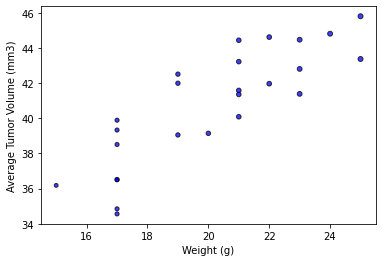

In [203]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap = clean_df.loc[lambda clean_df: clean_df["Drug Regimen"]=="Capomulin"]
avg_tumor_volume = cap.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
weight = cap.groupby(["Mouse ID"]).mean()["Weight (g)"]
plt.scatter(weight, avg_tumor_volume, marker="o", facecolors="blue", edgecolors="black", s=weight, alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

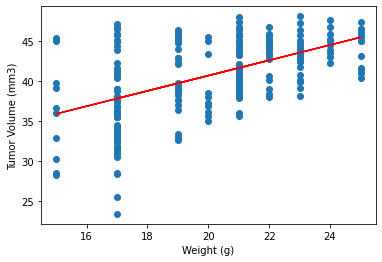

In [211]:
x_values = cap["Weight (g)"]
y_values = cap["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()